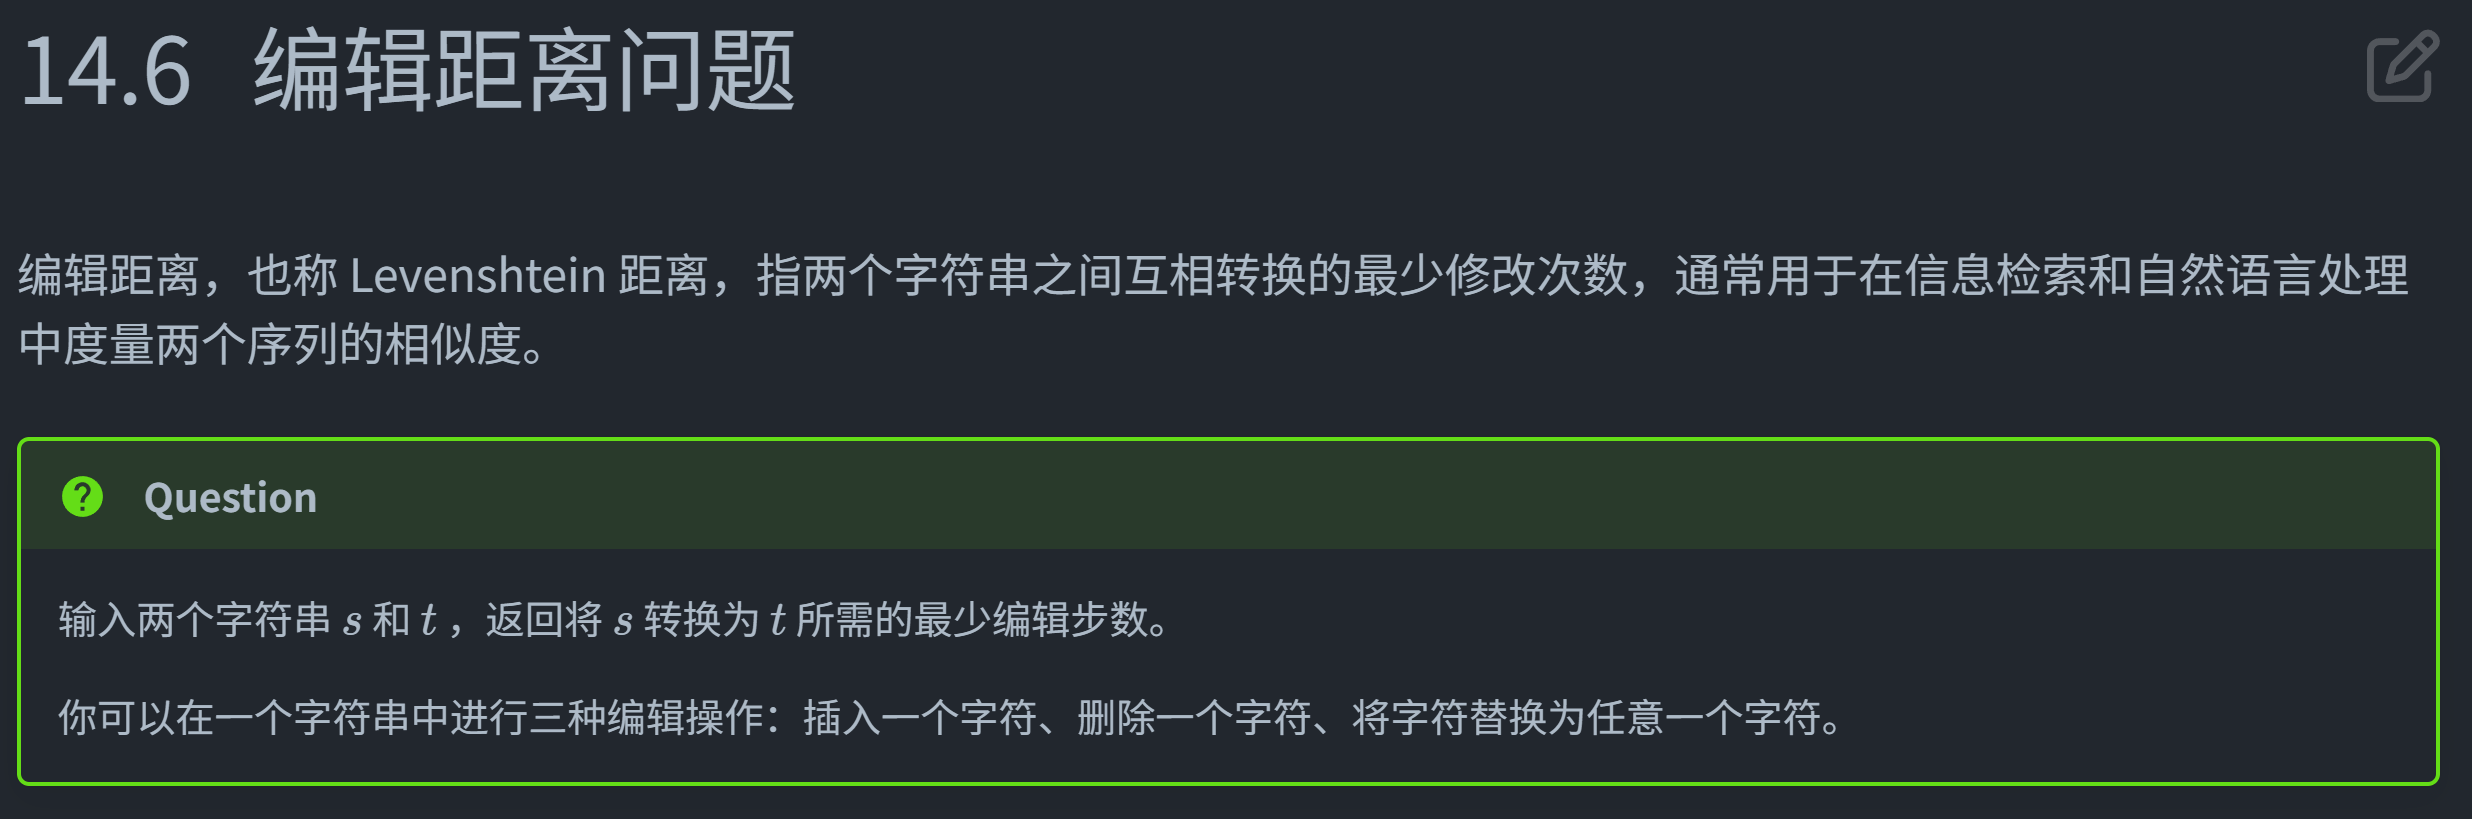
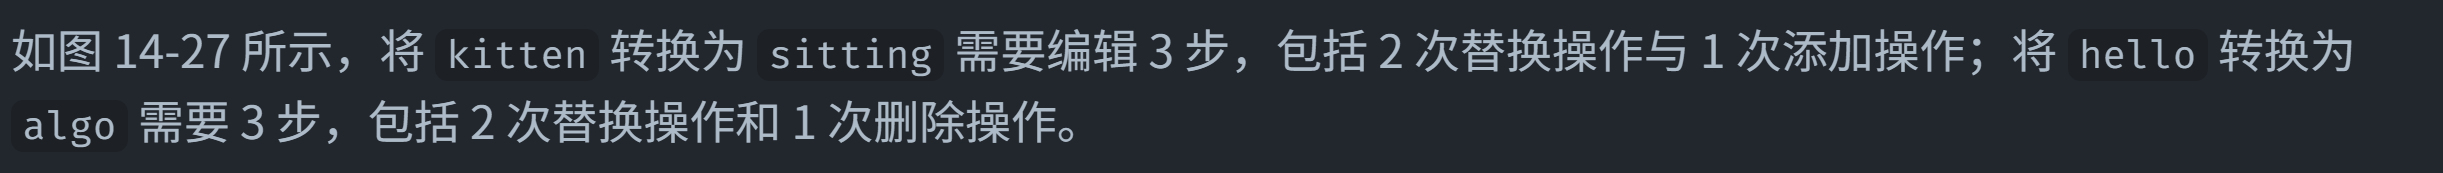
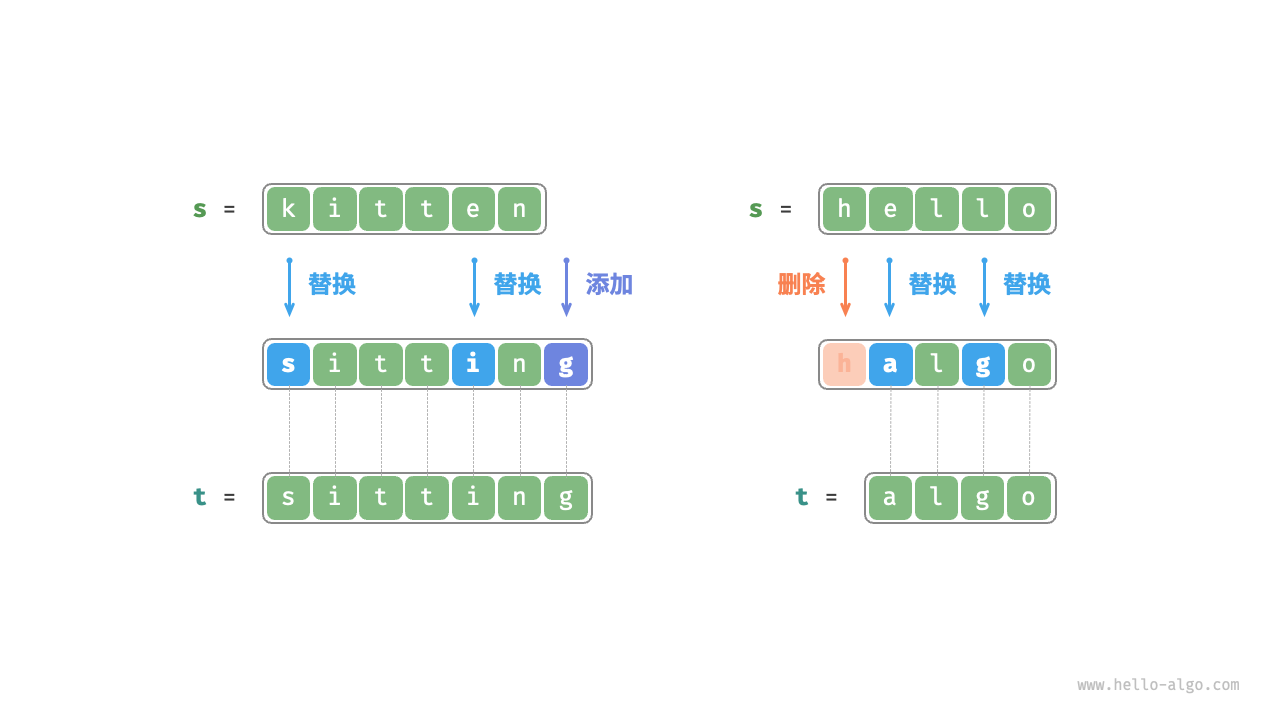
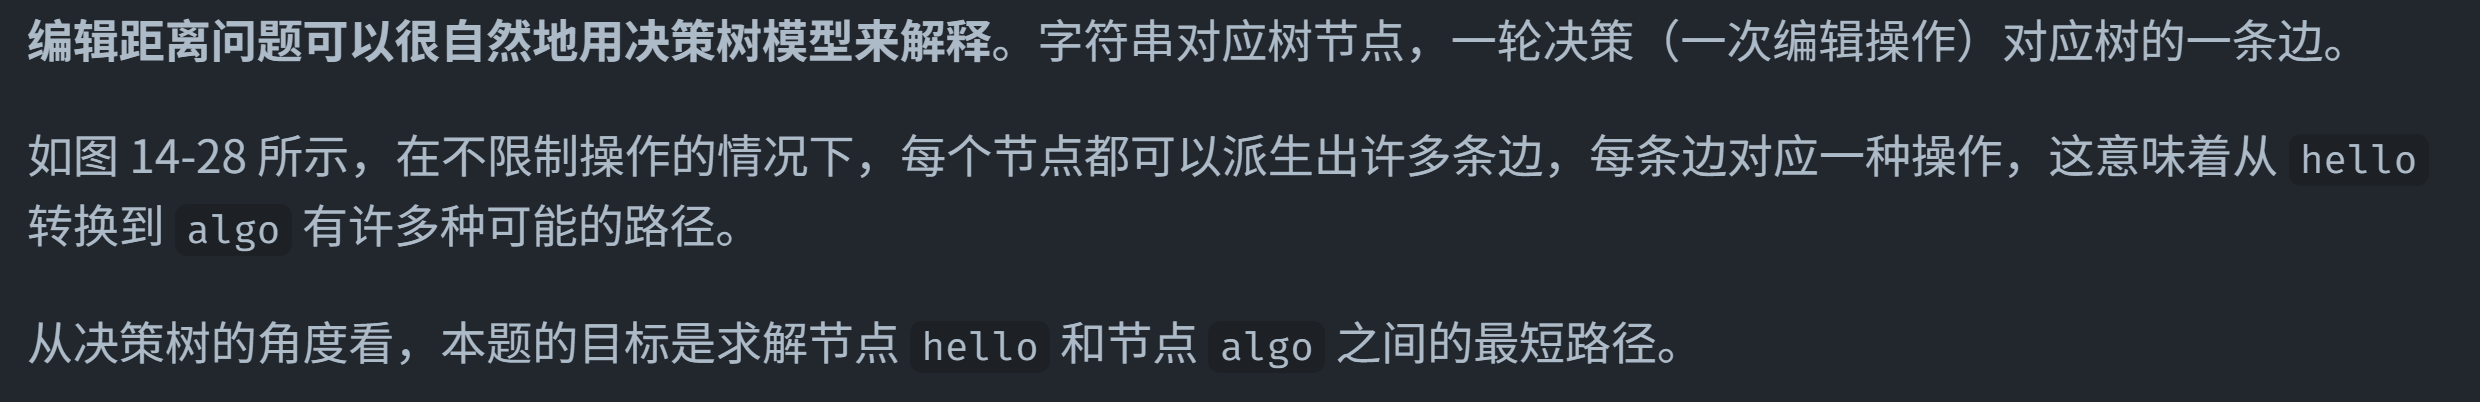
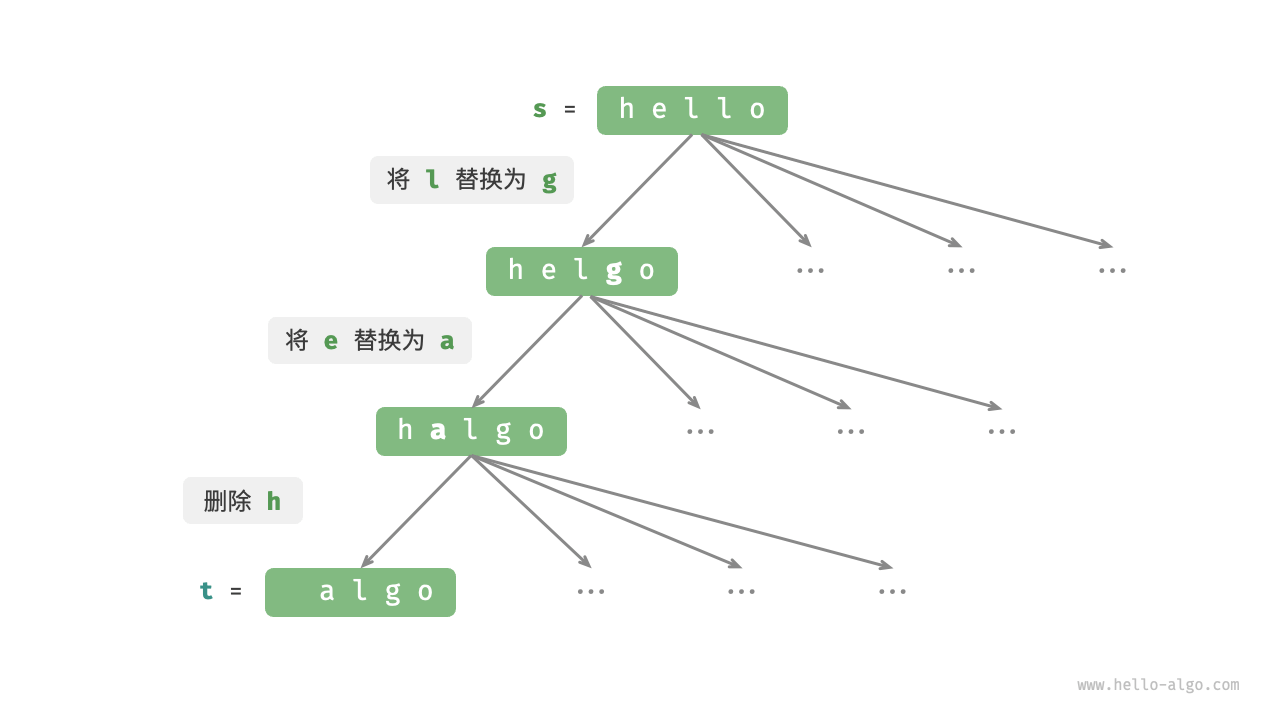
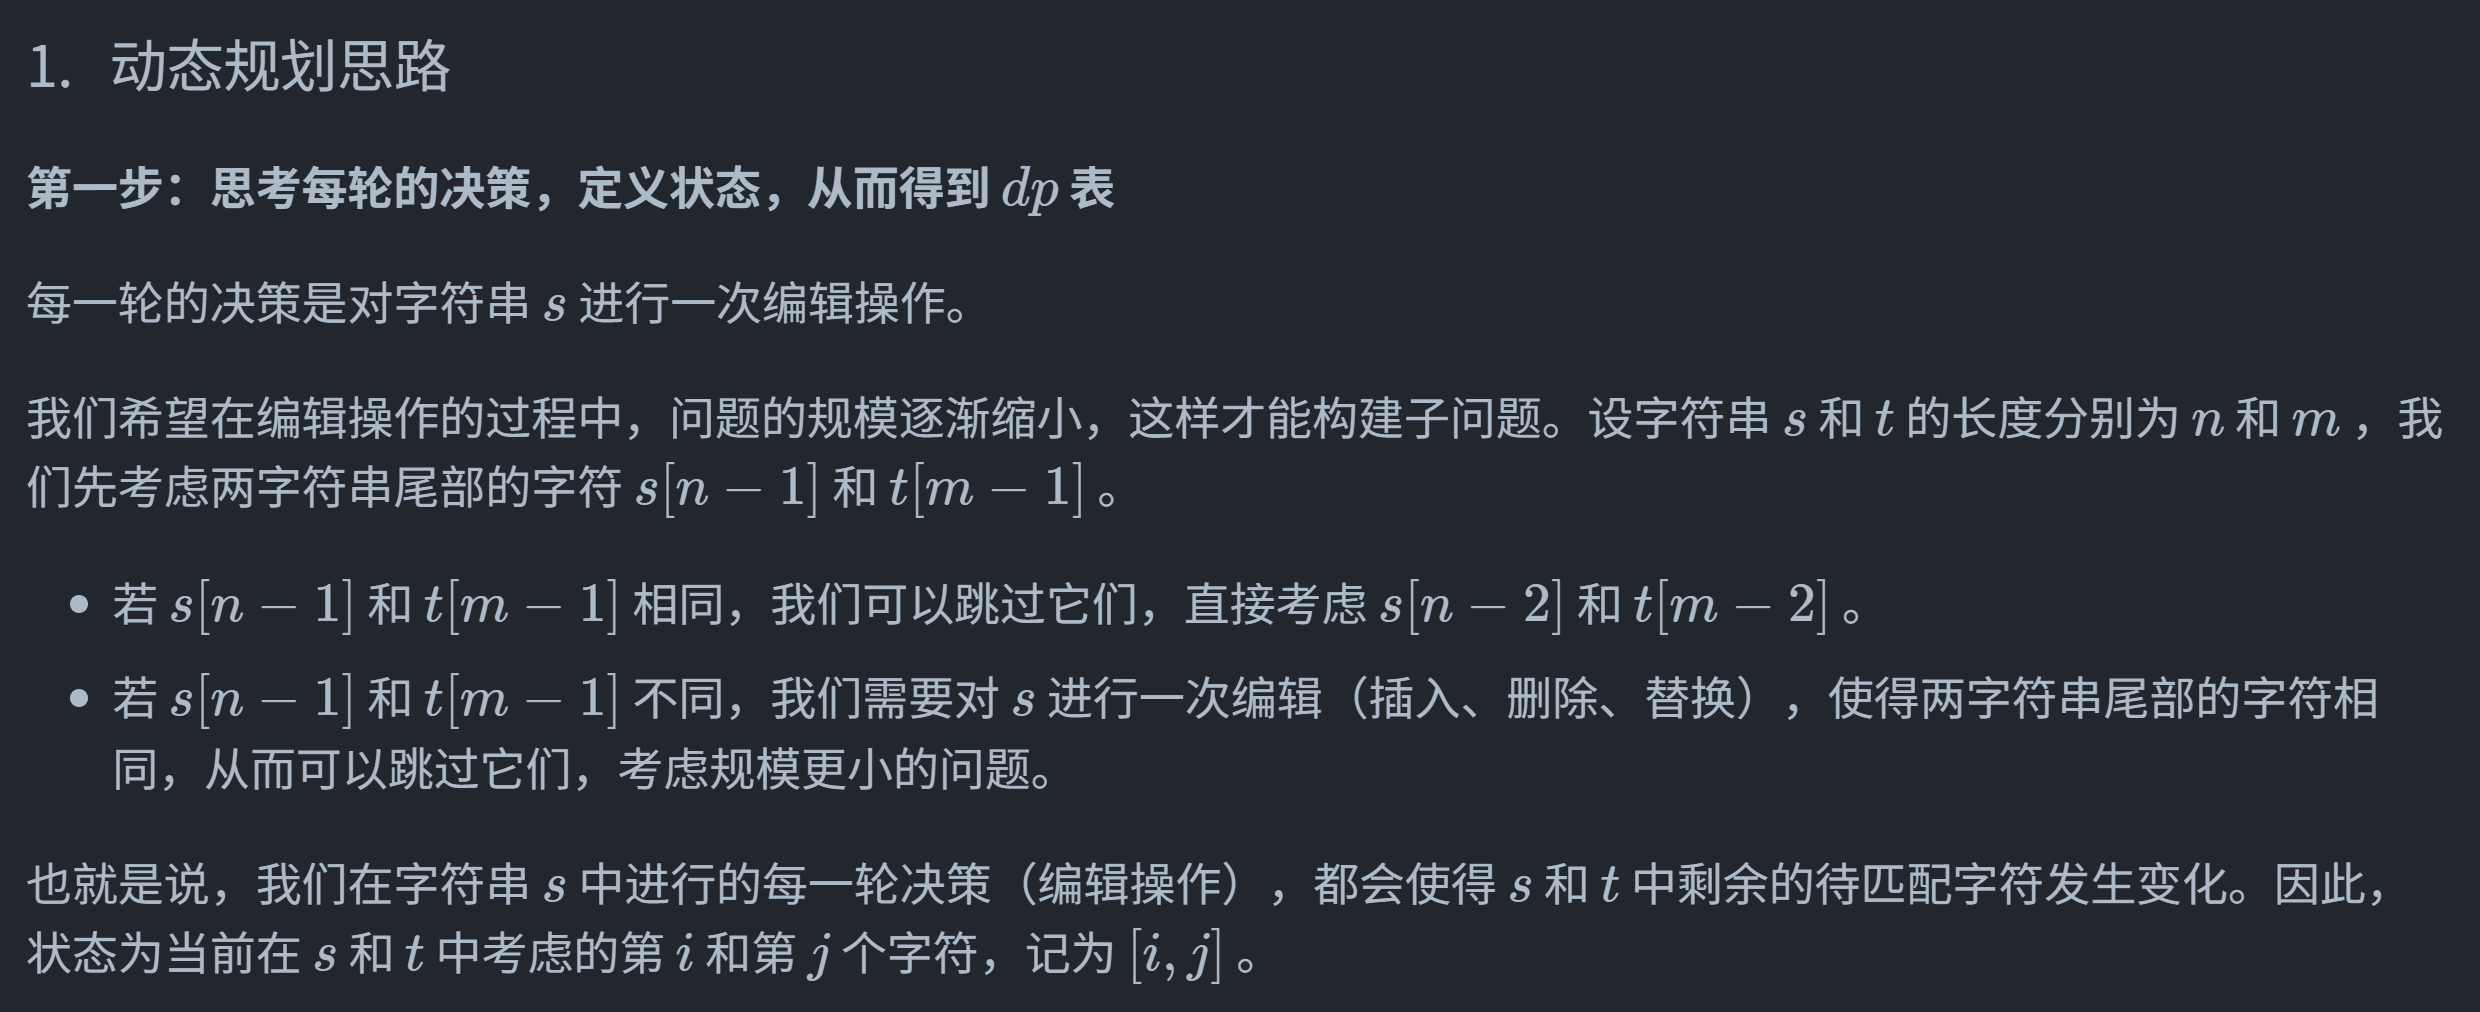
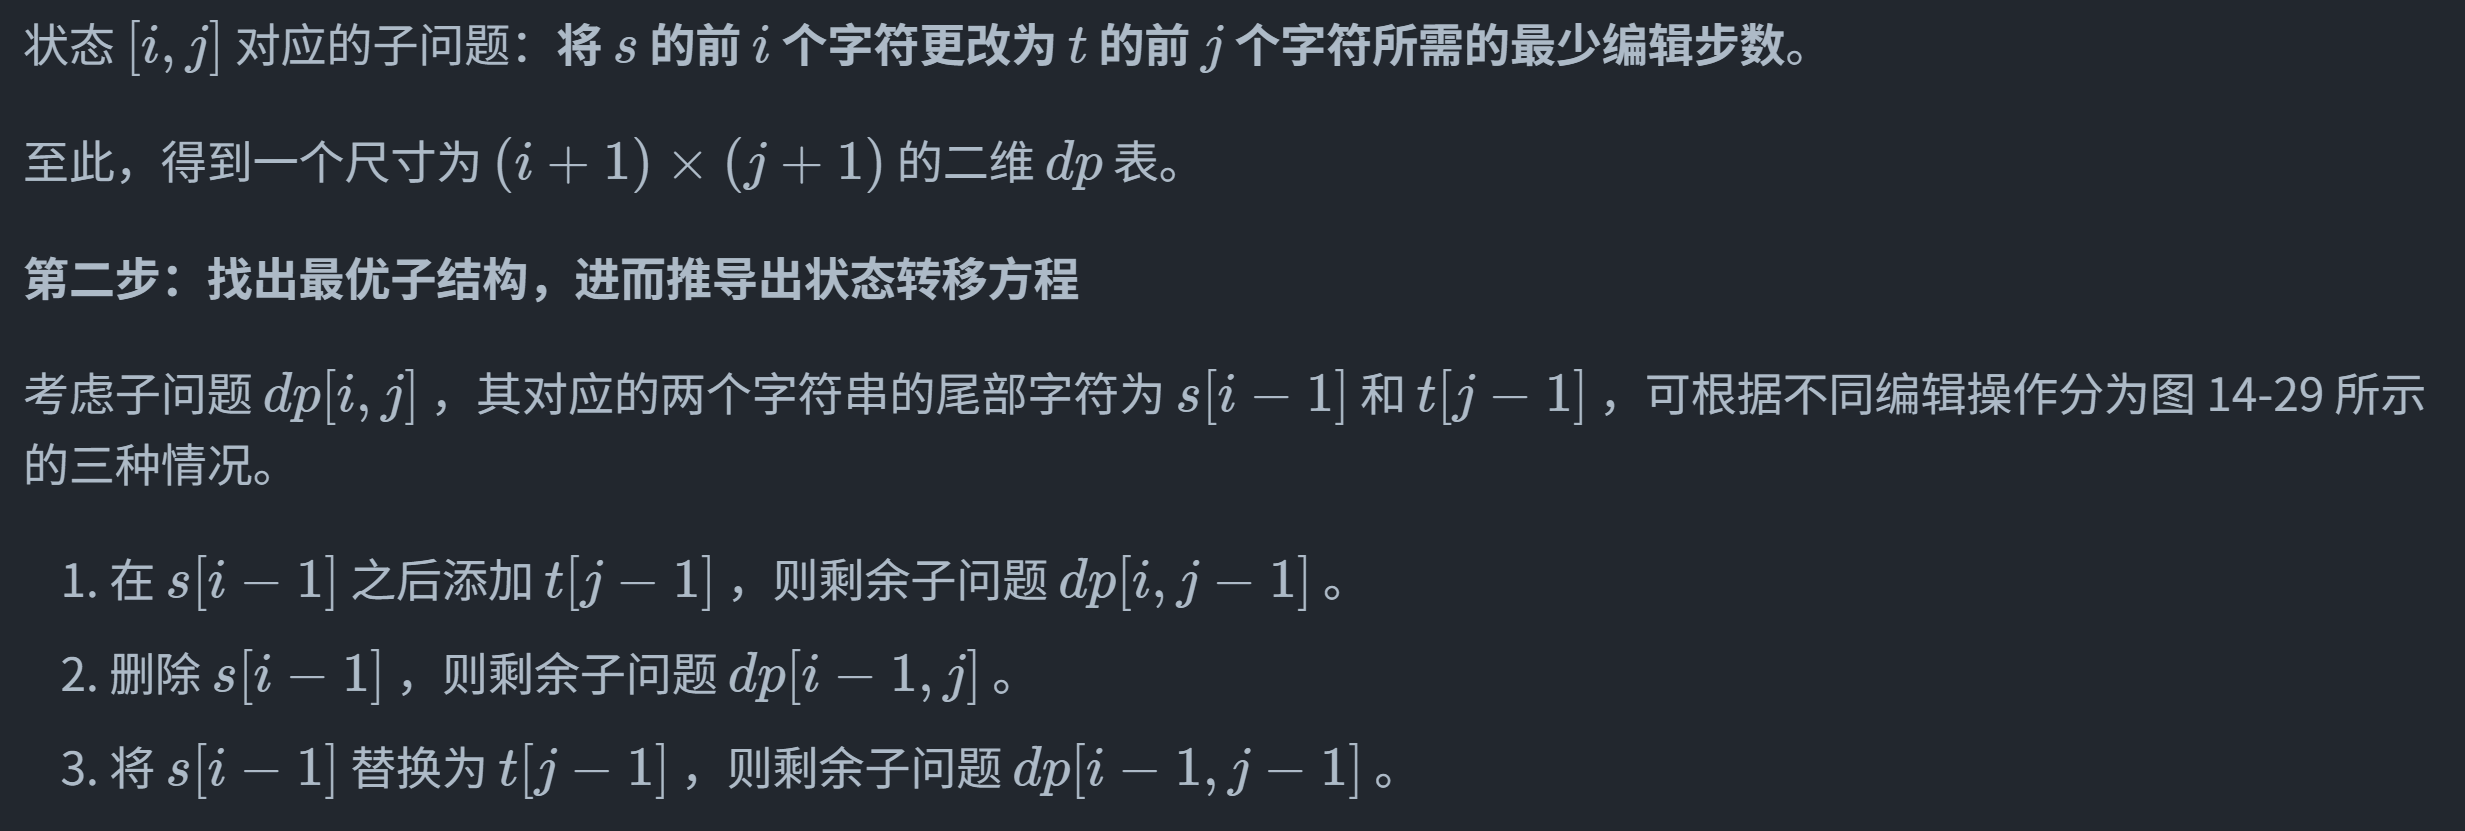
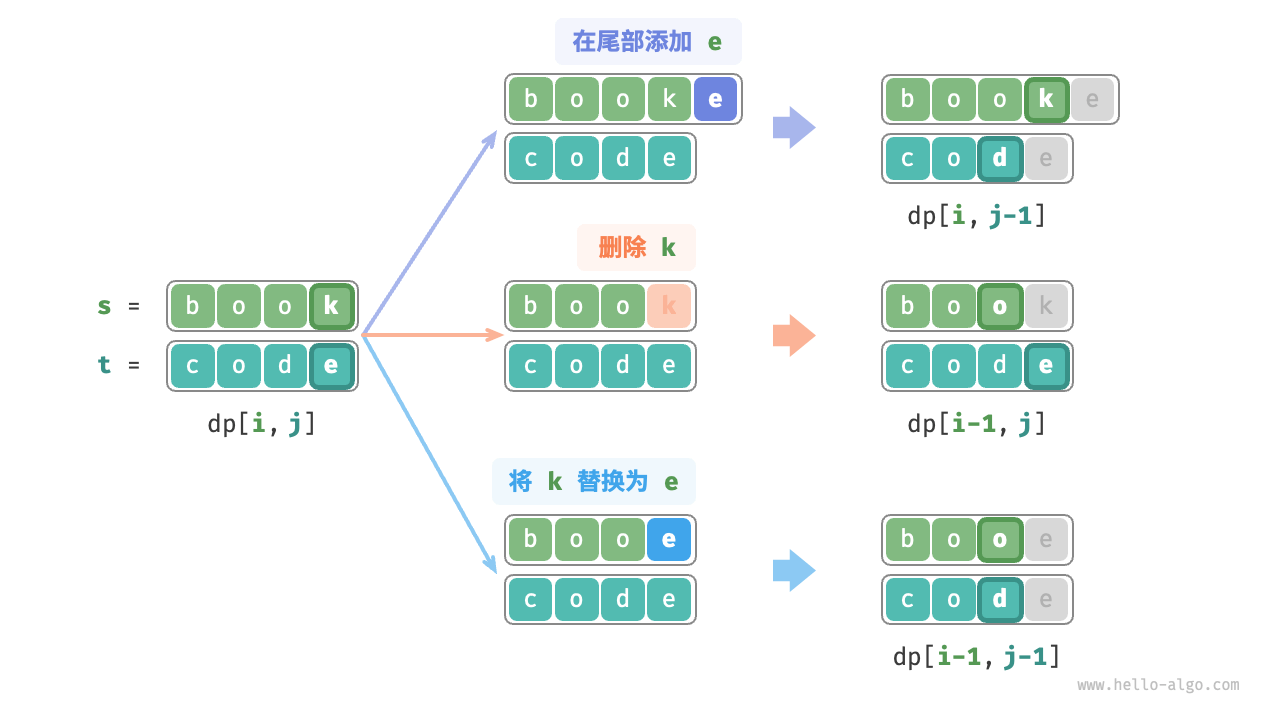
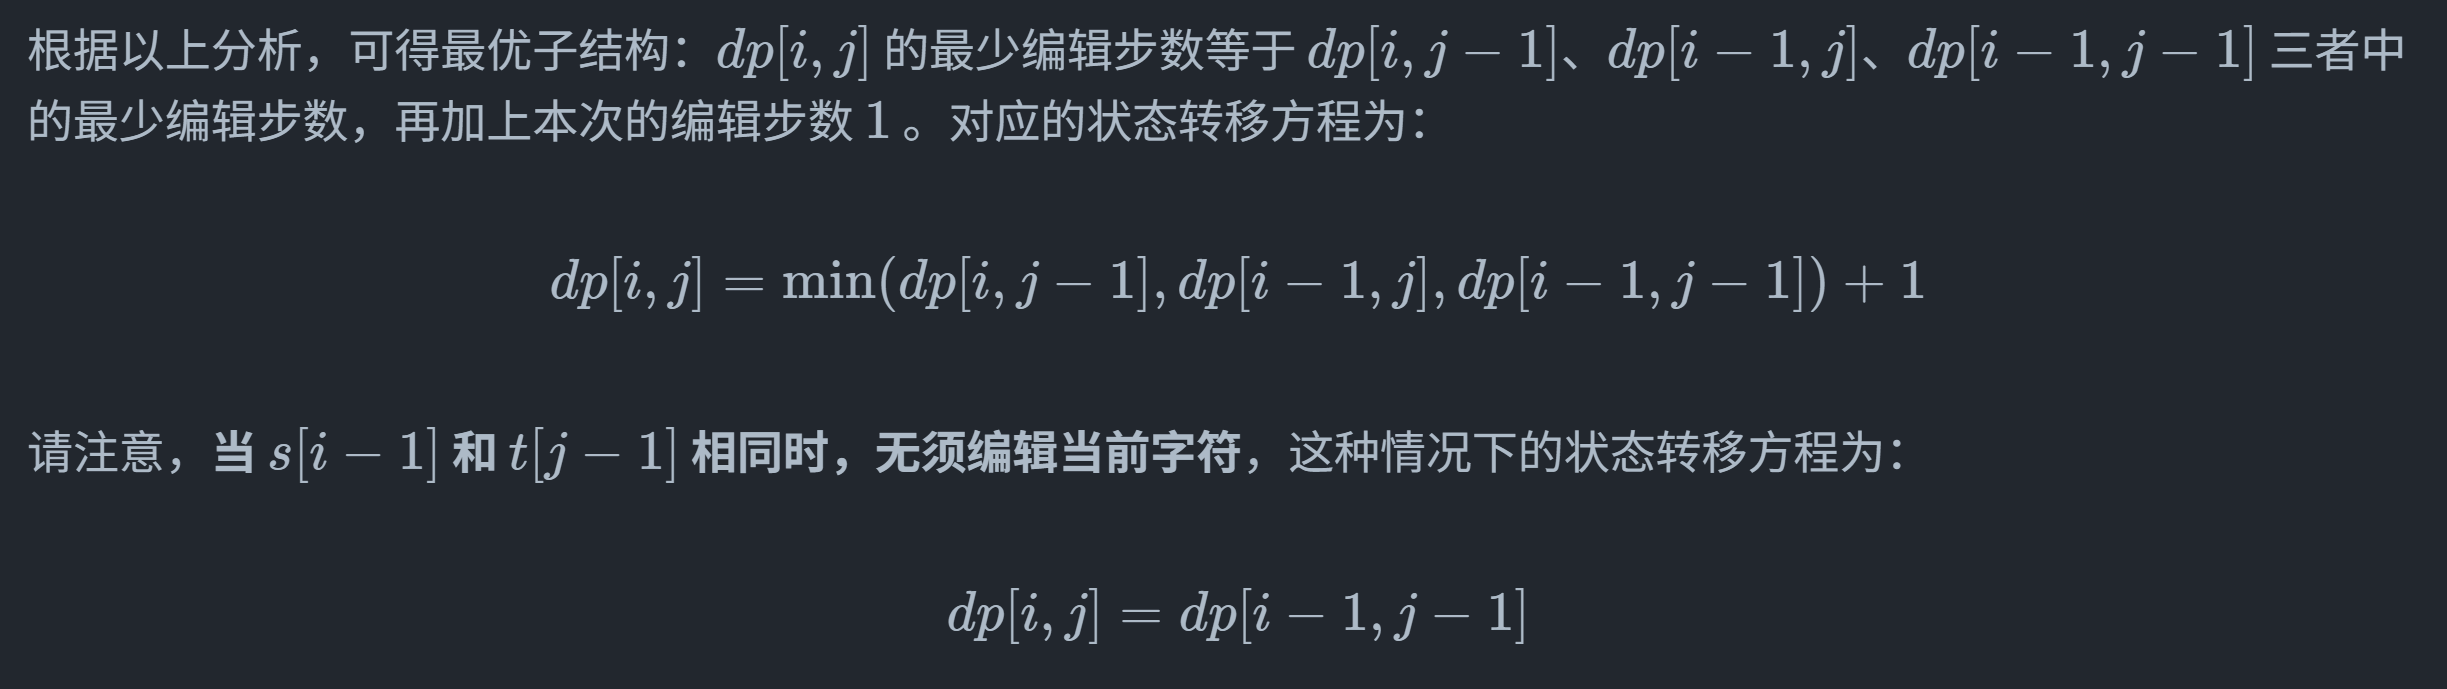
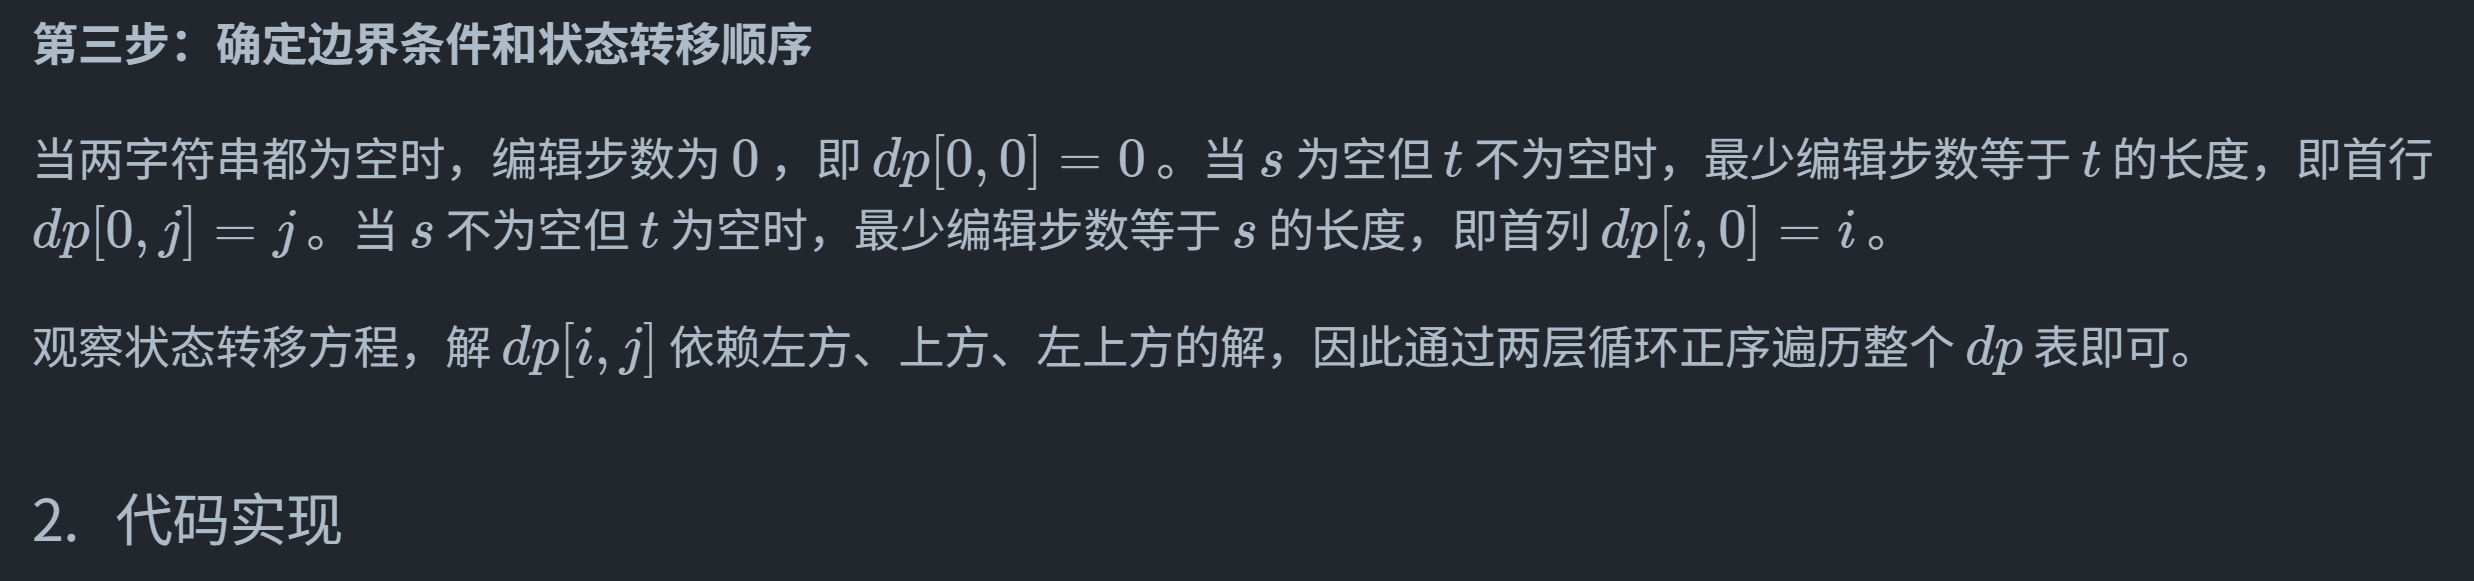

In [2]:
def edit_distance_dp(s: str, t: str) -> int:
    """编辑距离：动态规划"""
    n, m = len(s), len(t)
    dp = [[0] * (m + 1) for _ in range(n + 1)]
    # 状态转移：首行首列
    for i in range(1, n + 1):
        dp[i][0] = i
    for j in range(1, m + 1):
        dp[0][j] = j
    # 状态转移：其余行和列
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if s[i - 1] == t[i - 1]:
                # 若两字符相等，则直接跳过此两字符
                dp[i][j] = dp[i - 1][j - 1]
            else:
                # 最少编辑步数 = 插入、删除、替换这三种操作的最少编辑步数 + 1
                dp[i][j] = min(dp[i][j - 1], dp[i - 1][j], dp[i - 1][j - 1]) + 1
    return dp[n][m]

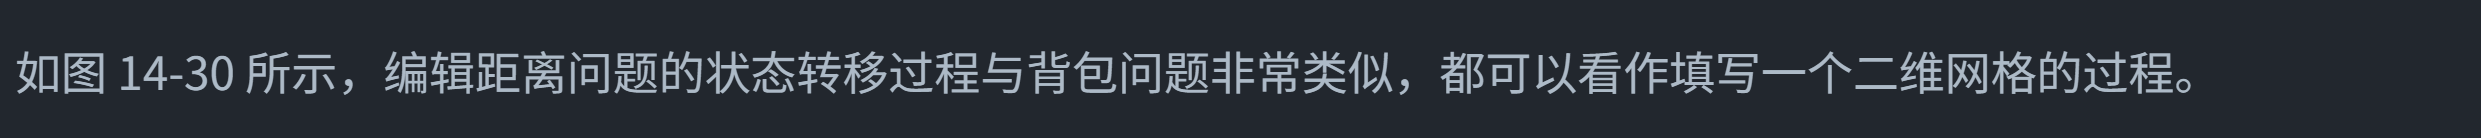
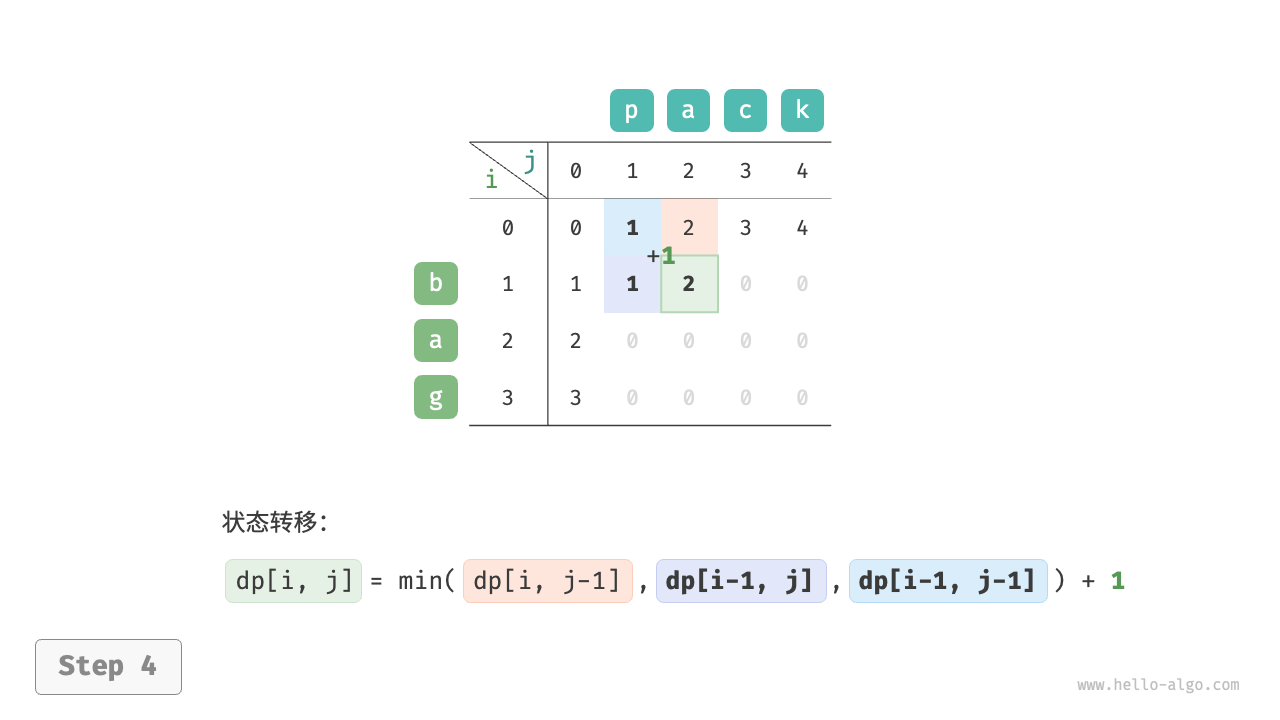
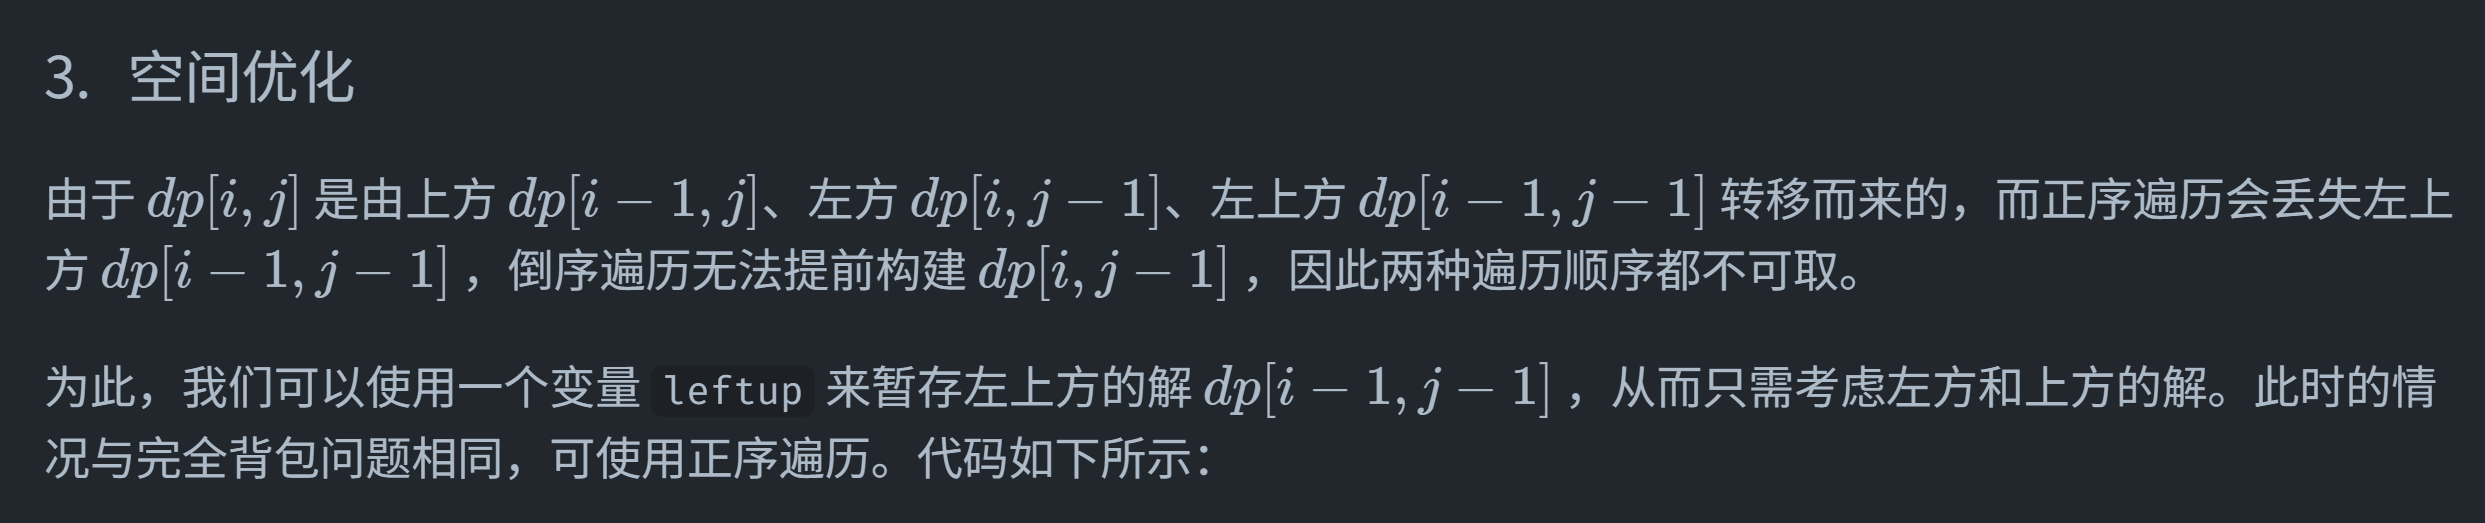

In [3]:
def edit_distance_dp_comp(s: str, t: str) -> int:
    """编辑距离：空间优化后的动态规划"""
    n, m = len(s), len(t)
    dp = [0] * (m + 1)
    # 状态转移：首行
    for j in range(1, m + 1):
        dp[j] = j
    # 状态转移：其余行
    for i in range(1, n + 1):
        # 状态转移：首列
        leftup = dp[0]  # 暂存 dp[i-1, j-1]
        dp[0] += 1
        # 状态转移：其余列
        for j in range(1, m + 1):
            temp = dp[j]
            if s[i - 1] == t[j - 1]:
                # 若两字符相等，则直接跳过此两字符
                dp[j] = leftup
            else:
                # 最少编辑步数 = 插入、删除、替换这三种操作的最少编辑步数 + 1
                dp[j] = min(dp[j - 1], dp[j], leftup) + 1
            leftup = temp  # 更新为下一轮的 dp[i-1, j-1]
    return dp[m]